# SARIMA

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
from pmdarima import auto_arima

In [18]:
df=pd.read_csv('../Data/co2_mm_mlo.csv')

In [19]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [20]:
df['date']=pd.to_datetime({'year':df['year'],
                          'month':df['month'],
                          'day':1})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [22]:
df=df.set_index('date')
df.index.freq='MS'

In [23]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


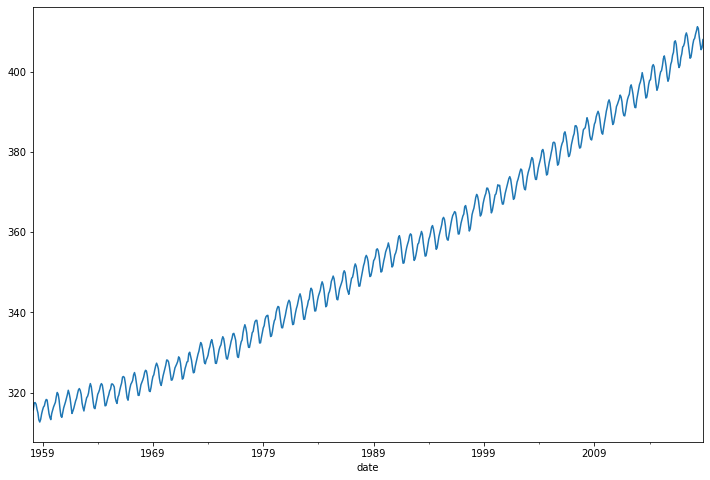

In [25]:
df['interpolated'].plot(figsize=(12,8));

In [26]:
result=seasonal_decompose(df['interpolated'],model='additive')

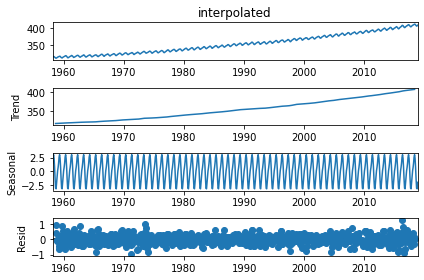

In [28]:
result.plot();

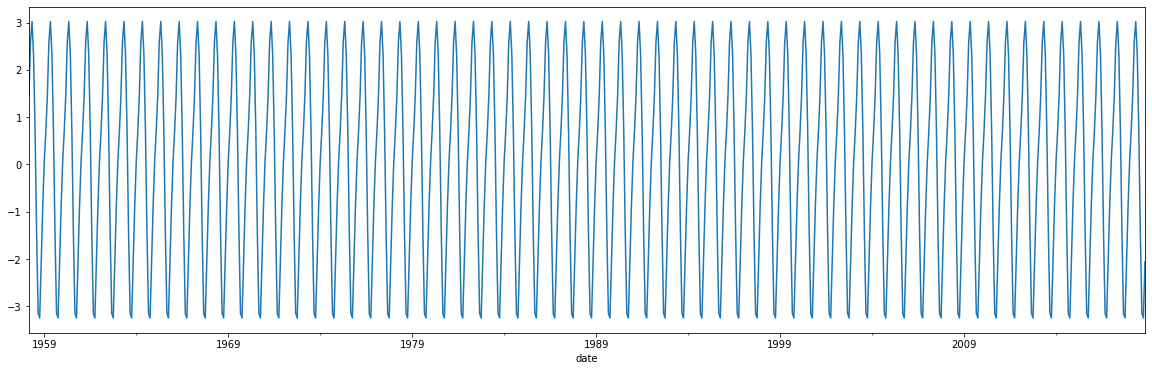

In [30]:
result.seasonal.plot(figsize=(20,6));

In [31]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\li

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.309
Date:                            Wed, 26 Aug 2020   AIC                            424.618
Time:                                    11:29:52   BIC                            452.160
Sample:                                         0   HQIC                           435.245
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3597      0.114      3.152      0.002       0.136       0.583
ar.L2          0.0844      0.059      1.440      0.150      -0.030       0.199
ma.L1         -0.7099      0.109     -6.525      0.000      -0.923      -0.497
ar.S.L12       0.9996      0.000   2747.123      0.000       0.999       1.000
ma.S.L12      -0.8637      0.022    -39.989      0.000      -0.906      -0.821
sigma2         0.0956      0.005     20.449      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       43.75   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.32   Prob(JB):                         0.11
Heteroskedasticity (H):               1.12   Skew:                             0.00
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
len(df)

729

In [33]:
train=df.iloc[:717]
test=df.iloc[717:]

In [34]:
model=SARIMAX(train['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))

In [35]:
results=model.fit()
results.summary()

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.890
Date:                            Wed, 26 Aug 2020   AIC                            415.780
Time:                                    11:31:42   BIC                            443.222
Sample:                                03-01-1958   HQIC                           426.377
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3505      0.085      4.119      0.000       0.184       0.517
ar.L2          0.0858      0.051      1.687      0.092      -0.014       0.186
ma.L1         -0.7053      0.080     -8.792      0.000      -0.863      -0.548
ar.S.L12       0.9996      0.000   2655.545      0.000       0.999       1.000
ma.S.L12      -0.8644      0.023    -37.529      0.000      -0.910      -0.819
sigma2         0.0954      0.005     20.276      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       44.15   Jarque-Bera (JB):                 4.61
Prob(Q):                              0.30   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
start=len(train)
end=len(train)+len(test)-1

In [37]:
pred=results.predict(start,end,typ='levels').rename('SARIMA Predictions')

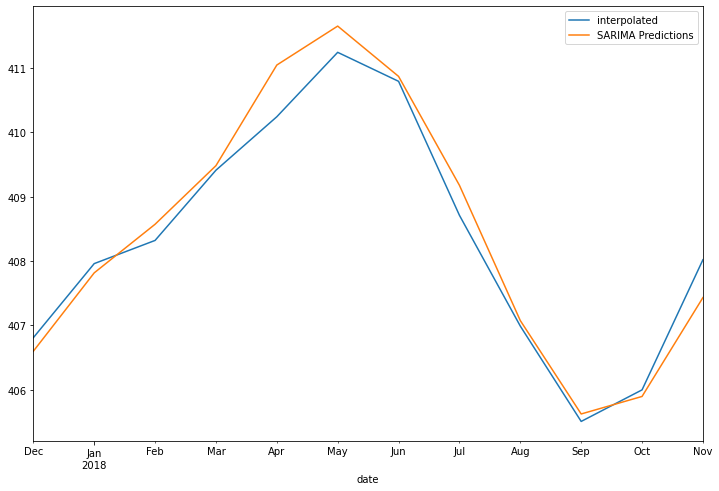

In [39]:
test['interpolated'].plot(figsize=(12,8),legend=True)
pred.plot(legend=True);

In [40]:
from statsmodels.tools.eval_measures import rmse

In [41]:
rmse(test['interpolated'],pred)

0.3584685876981421

In [42]:
test['interpolated'].mean()

408.3333333333333

## Retrain on full data and forecast

In [43]:
model=SARIMAX(df['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))
results=model.fit()

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [44]:
forecast=results.predict(len(df),len(df)+11).rename('SARIMA forecast')

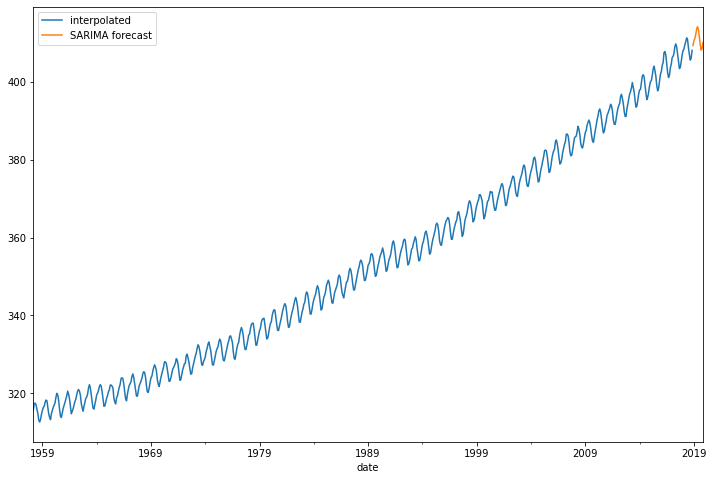

In [46]:
df['interpolated'].plot(legend=True,figsize=(12,8))
forecast.plot(legend=True);

In [47]:
forecast

2018-12-01    409.260451
2019-01-01    410.416843
2019-02-01    411.076433
2019-03-01    411.991433
2019-04-01    413.443862
2019-05-01    414.096875
2019-06-01    413.358198
2019-07-01    411.613428
2019-08-01    409.565482
2019-09-01    408.112289
2019-10-01    408.414014
2019-11-01    410.014252
Freq: MS, Name: SARIMA forecast, dtype: float64

# SARIMAX

In [48]:
df=pd.read_csv('../Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)

In [49]:
df.index.freq='D'

In [50]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [51]:
df.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [52]:
df1=df.dropna()

In [53]:
df.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [54]:
cols=['rest1', 'rest2', 'rest3','rest4', 'total']

In [56]:
for col in cols:
    df1[col]=df1[col].astype(int)

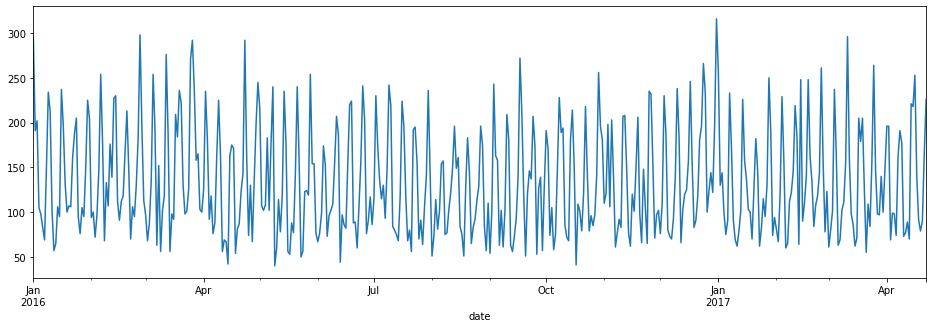

In [61]:
df1['total'].plot(figsize=(16,5));

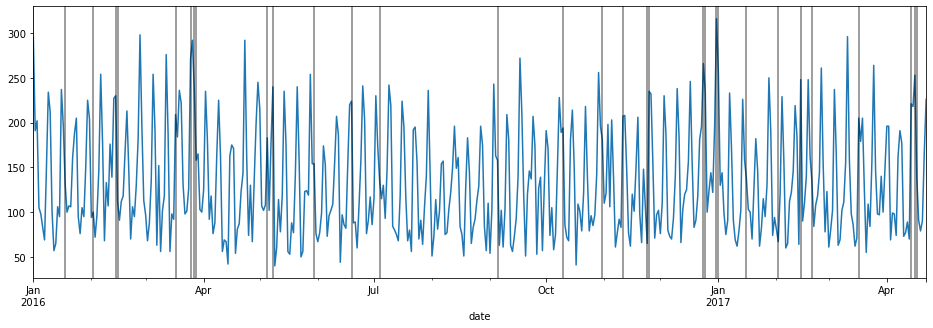

In [62]:
ax=df1['total'].plot(figsize=(16,5))

for day in df1[df1.holiday==1].index:
    ax.axvline(x=day,color='k',alpha=0.5);

Holidays have higher visitors

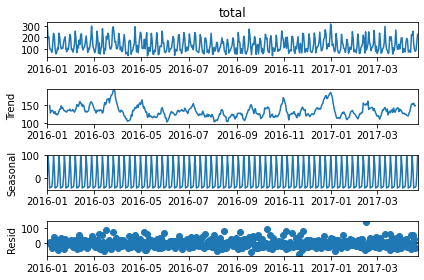

In [65]:
result=seasonal_decompose(df1['total'],model='additive')
result.plot();

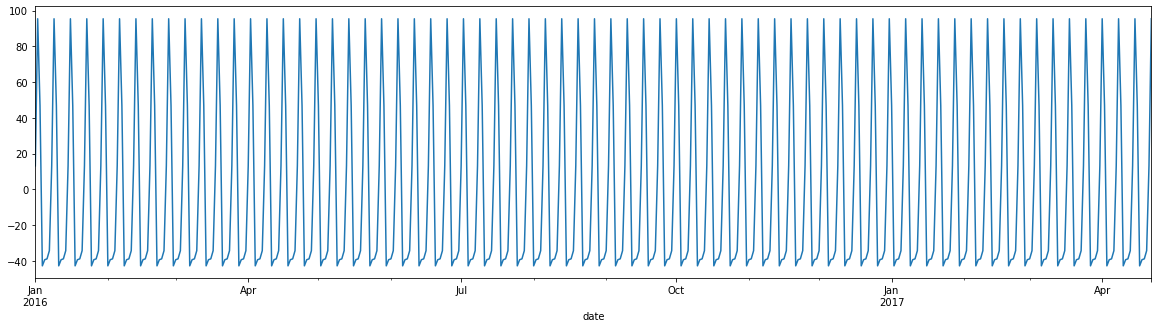

In [67]:
result.seasonal.plot(figsize=(20,5)); #weekly seasonality

In [68]:
len(df1)

478

In [69]:
train=df1.iloc[:436]
test=df1.iloc[436:]

In [75]:
best_params=auto_arima(df1['total'],seasonal=True,m =7)

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\li

In [77]:
best_params.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2384.908
Date:                   Wed, 26 Aug 2020   AIC                           4777.816
Time:                           13:54:21   BIC                           4794.495
Sample:                                0   HQIC                          4784.373
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.9779      1.671      2.979      0.003       1.702       8.253
ar.S.L7        0.9602      0.013     74.406      0.000       0.935       0.985
ma.S.L7       -0.7410      0.049    -15.252      0.000      -0.836      -0.646
sigma2      1193.9784     69.427     17.198      0.000    1057.904    1330.053
===================================================================================
Ljung-Box (Q):                       68.47   Jarque-Bera (JB):                62.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.74
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
best_params.get_params

<bound method BaseEstimator.get_params of ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 1, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)>

In [78]:
model=SARIMAX(train['total'],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=True)

In [79]:
results=model.fit()

In [80]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Wed, 26 Aug 2020   AIC                           4336.738
Time:                           13:58:51   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.58e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9383      0.024    -39.198      0.000      -0.985      -0.891
sigma2      1111.8046     58.739     18.928      0.000     996.679    1226.930
===================================================================================
Ljung-Box (Q):                       67.58   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
start=len(train)
end=len(train)+len(test)-1

In [82]:
pred=results.predict(start,end,).rename('SARIMA model')

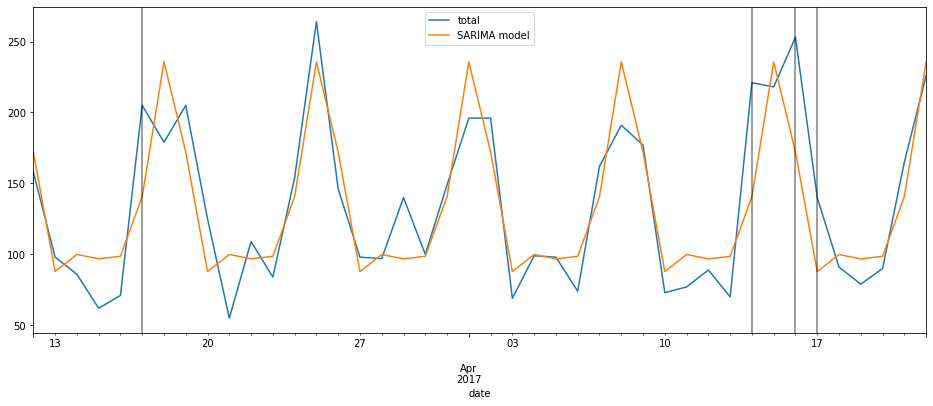

In [84]:
ax=test['total'].plot(figsize=(16,6),legend=True)
pred.plot(legend=True)

for day in test[test.holiday==1].index:
    ax.axvline(x=day,color='k',alpha=0.5);

this shows that holiday exogenous variable would improve the model

In [85]:
rmse(test['total'],pred)

31.913977248789752

In [86]:
test['total'].mean()

134.26190476190476

##### Adding the exogenous variable

In [89]:
best_model=auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,m=7)

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\rhitc\appdata\local\programs\python\python37\li

In [90]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2381.220
Date:                             Wed, 26 Aug 2020   AIC                           4774.441
Time:                                     16:39:17   BIC                           4799.458
Sample:                                 01-01-2016   HQIC                          4784.276
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     23.9507      5.746      4.168      0.000      12.688      35.213
holiday       65.4115      7.065      9.258      0.000      51.564      79.260
ar.L1          0.0970      0.072      1.353      0.176      -0.044       0.237
ar.S.L7        0.8015      0.046     17.389      0.000       0.711       0.892
ma.S.L7       -0.4291      0.105     -4.070      0.000      -0.636      -0.222
sigma2      1668.6341    159.788     10.443      0.000    1355.456    1981.812
===================================================================================
Ljung-Box (Q):                      285.92   Jarque-Bera (JB):                 7.35
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               0.90   Skew:                             0.30
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
best_model.get_params

<bound method BaseEstimator.get_params of ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(1, 0, 1, 7),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)>

In [92]:
model=SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7),
        )

In [93]:
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.062
Date:                             Wed, 26 Aug 2020   AIC                           4188.124
Time:                                     16:40:59   BIC                           4208.512
Sample:                                 01-01-2016   HQIC                          4196.170
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.5107      3.763     18.204      0.000      61.134      75.887
ar.L1          0.2115      0.044      4.805      0.000       0.125       0.298
ar.S.L7        0.9999   8.97e-05   1.12e+04      0.000       1.000       1.000
ma.S.L7       -0.9461      0.023    -41.641      0.000      -0.991      -0.902
sigma2       783.3727     45.145     17.352      0.000     694.890     871.855
===================================================================================
Ljung-Box (Q):                       36.27   Jarque-Bera (JB):                20.24
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.23
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
start=len(train)
end=len(train)+len(test)-1

In [95]:
pred=result.predict(start,end,exog=test[['holiday']]).rename('SARIMAX')

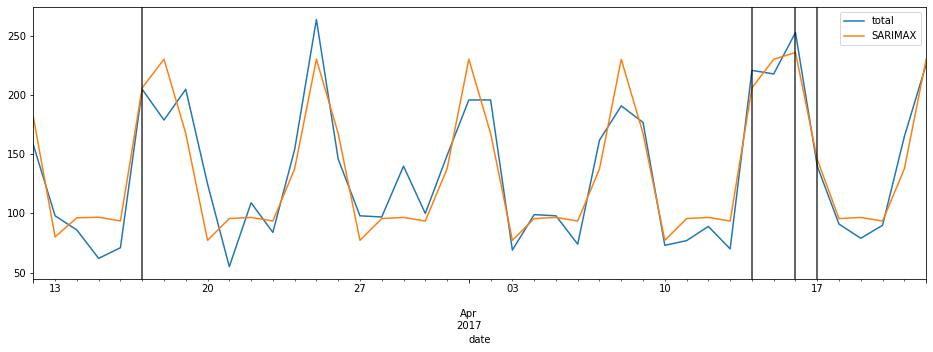

In [98]:
ax=test['total'].plot(figsize=(16,5),legend=True)
pred.plot(legend=True)

for day in test[test['holiday']==1].index:
    ax.axvline(x=day,color='black',alpha=0.8);

In [99]:
rmse(test['total'],pred)

23.262408596766395

Adding exogeneous improved the RMSE from 39.91

## Forecasting into the future

In [100]:
model=SARIMAX(df1['total'],exog=df1['holiday'],order=(1,0,0),seasonal_order=(1,0,1,7))

In [101]:
results=model.fit()

c:\users\rhitc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [103]:
len(df1)

478

In [106]:
exog_forecast=df[478:][['holiday']]

In [109]:
forecast=results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename('SARIMAX Forecast')

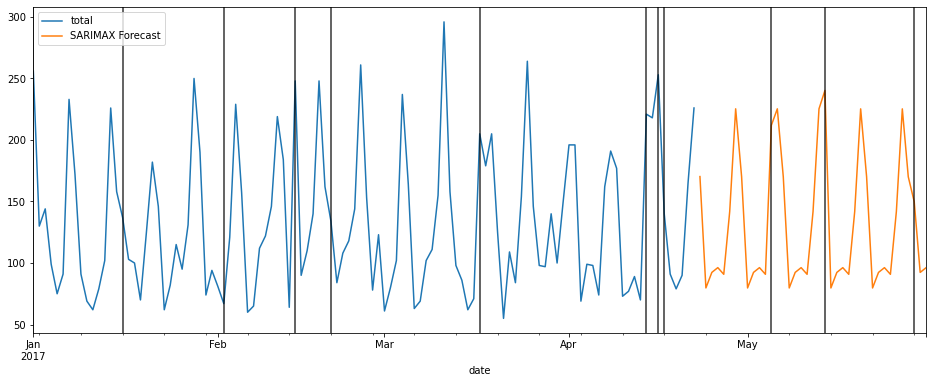

In [112]:
ax=df1['total'].loc['2017-01-01':].plot(figsize=(16,6),legend=True)
forecast.plot(legend=True)
for day in df[df['holiday']==1].index:
    ax.axvline(x=day,color='black',alpha=0.8);